# Import Library

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Load Data

In [8]:


file_path = 'mushrooms.csv'
mushroom_data = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# clean the columns

In [9]:
mushroom_data.columns = mushroom_data.columns.str.lower().str.replace(r'\W', '_', regex=True)

mushroom_data.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

# Try to check null values

In [10]:
null_columns = mushroom_data.isnull().sum()

null_columns = null_columns[null_columns > 0]

null_columns

Series([], dtype: int64)

# Visualize the dataset

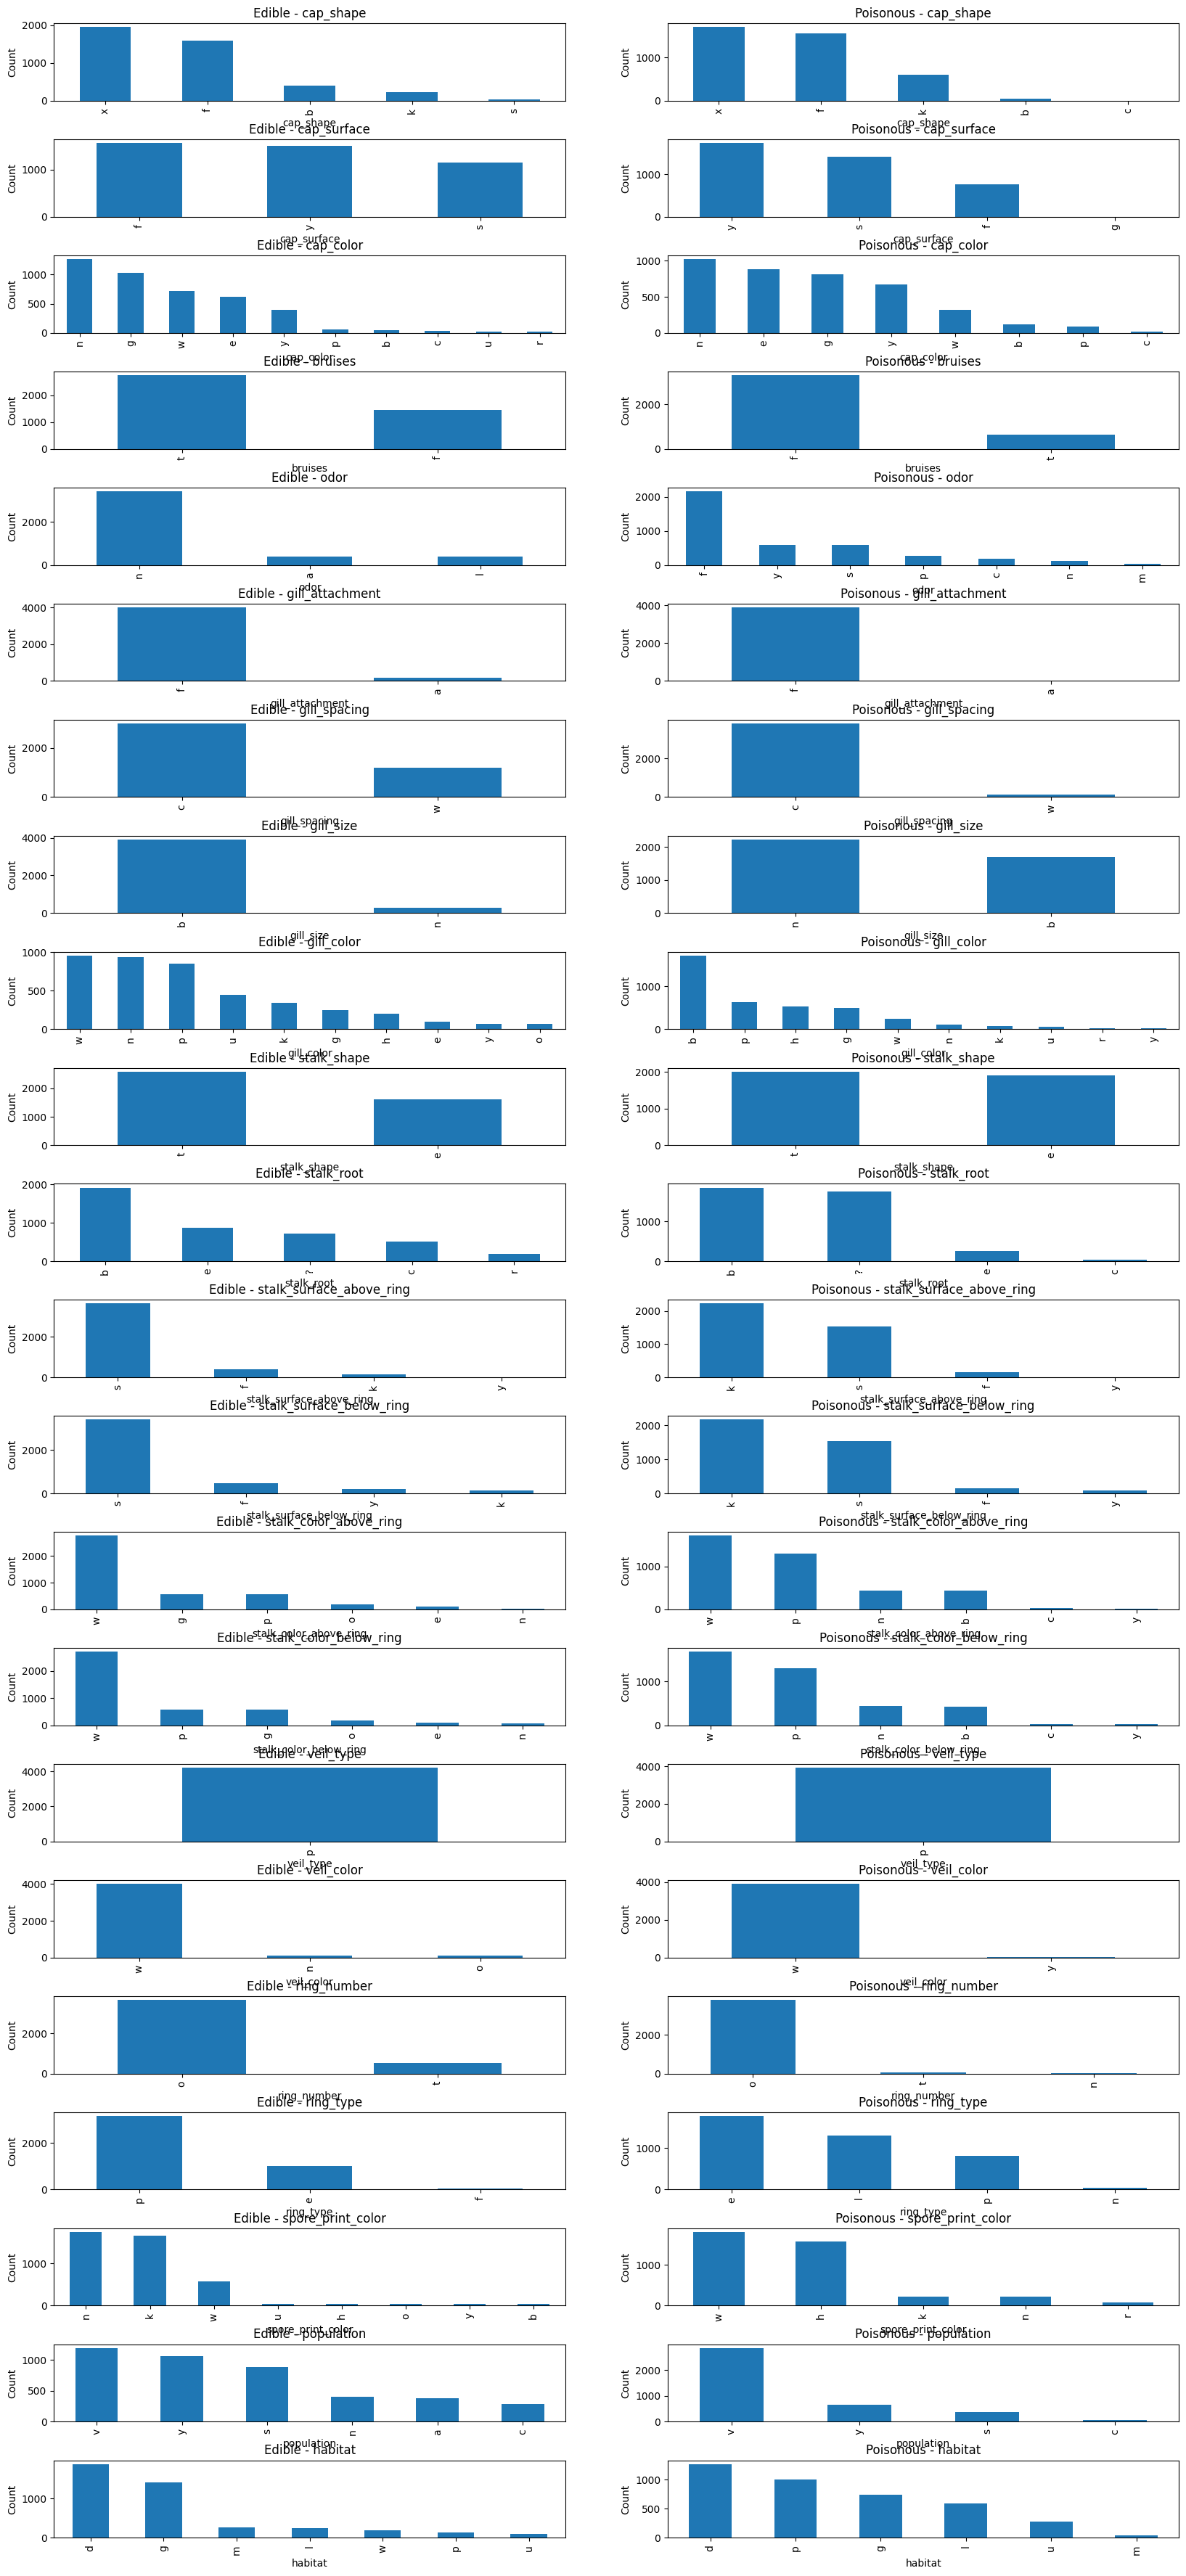

In [11]:
columns = mushroom_data.columns.drop('class')

plt.figure(figsize=(20, 45))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 2, 2*i-1)
    mushroom_data[mushroom_data['class'] == 'e'][column].value_counts().plot(kind='bar')
    plt.title(f'Edible - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.subplot(len(columns), 2, 2*i)
    mushroom_data[mushroom_data['class'] == 'p'][column].value_counts().plot(kind='bar')
    plt.title(f'Poisonous - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.show()

# Try to find most important columns

In [12]:
le = LabelEncoder()
encoded_data = mushroom_data.apply(le.fit_transform)

X = encoded_data.drop('class', axis=1)
y = encoded_data['class']

mutual_info = mutual_info_classif(X, y)

mutual_info_series = pd.Series(mutual_info, index=X.columns)

sorted_mutual_info = mutual_info_series.sort_values(ascending=False)

sorted_mutual_info

odor                        0.387380
ring_type                   0.213826
stalk_surface_above_ring    0.191845
stalk_surface_below_ring    0.185561
gill_color                  0.183261
gill_size                   0.158637
bruises                     0.134790
spore_print_color           0.127542
population                  0.105912
stalk_color_above_ring      0.104403
stalk_color_below_ring      0.101234
habitat                     0.074855
gill_spacing                0.062967
stalk_root                  0.062637
cap_shape                   0.026919
ring_number                 0.025633
cap_surface                 0.021204
veil_color                  0.017705
stalk_shape                 0.013026
veil_type                   0.008367
cap_color                   0.006004
gill_attachment             0.003322
dtype: float64

# Data Split for Train

In [13]:
selected_columns = ['odor', 'ring_type', 'stalk_surface_above_ring',
                    'gill_color', 'stalk_surface_below_ring', 'class']

selected_data = mushroom_data[selected_columns]

train_data, test_data = train_test_split(selected_data, test_size=0.25, random_state=42)

X_train = train_data.drop(['class'], axis=1)
y_train = train_data['class']
X_test = test_data.drop(['class'], axis=1)
y_test = test_data['class']

categorical_features = X_train.columns
column_transformer = ColumnTransformer([
    ("encoder", OneHotEncoder(), categorical_features)
], remainder='passthrough')

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Test Different Model

In [14]:
# Preparing the data
#X_train = train_data.drop(['class'], axis=1)
#y_train = train_data['class']
#X_test = test_data.drop(['class'], axis=1)
#y_test = test_data['class']

# Encoding categorical variables
#categorical_features = X_train.columns
#column_transformer = ColumnTransformer([("encoder", OneHotEncoder(), categorical_features)], remainder='passthrough')

#X_train_encoded = column_transformer.fit_transform(X_train)
#X_test_encoded = column_transformer.transform(X_test)

# Initializing models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)

# Training the RandomForestClassifier
rf_model.fit(X_train_encoded, y_train)
rf_pred = rf_model.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Training the LogisticRegression
logreg_model.fit(X_train_encoded, y_train)
logreg_pred = logreg_model.predict(X_test_encoded)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Training the SVC
svm_model.fit(X_train_encoded, y_train)
svm_pred = svm_model.predict(X_test_encoded)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Accuracy scores
rf_accuracy, logreg_accuracy, svm_accuracy

(0.9945839487936977, 0.9940915805022157, 0.9945839487936977)